In [649]:
# IMPORT DEPENDENCIES
# FOR DATA
import pandas as pd
import os
import csv
import math
import numpy as np
import time
import datetime
# import requests
# import datefinder

# # FOR SQL LITE
# from sqlalchemy import create_engine
# from datetime import date

# # FOR PLOTTING
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 8

# FOR MODELING
from scipy.optimize import curve_fit
# from splinter import Browser
# from bs4 import BeautifulSoup as BS
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# IMPORT DATA

In [650]:
# File path for the CSV Files
idahoFireWeatherDrought = os.path.join("..", "Data", "fires_Idaho_2000_2015_drought_weather.csv")

# Open the CSV Files, Convert to a Dataframe, and Save as a Variable
idaho_Fire_Weather_Drought_df = pd.read_csv(idahoFireWeatherDrought)
# fires_Idaho_df = pd.read_csv(idahoFires, dtype={"LOCAL_INCIDENT_ID": 'string', "FIRE_NAME": 'string'})

In [651]:
# Convert date to datetime format
idaho_Fire_Weather_Drought_df['DISCOVERY_DATE_CONVERTED'] = pd.to_datetime(idaho_Fire_Weather_Drought_df['DISCOVERY_DATE_CONVERTED'])
idaho_Fire_Weather_Drought_df['CONT_DATE_CONVERTED'] = pd.to_datetime(idaho_Fire_Weather_Drought_df['CONT_DATE_CONVERTED'])

idaho_Fire_Weather_Drought_df['DISCOVERY_DATE_CONVERTED']=idaho_Fire_Weather_Drought_df['DISCOVERY_DATE_CONVERTED'].apply(lambda x: int(x.strftime('%m')))
# View the Data in the Dataframe
# print(idaho_Fire_Weather_df.keys())
idaho_Fire_Weather_Drought_df

,Unnamed: 0,OBJECTID,Shape,Join_Count,TARGET_FID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,...,DAY3,DAY4,DAY_PRCP_1,DAY_PRCP_2,DAY_PRCP_3,DAY_PRCP_4,DAY_AVG_TEMP_1,DAY_AVG_TEMP_2,DAY_AVG_TEMP_3,DAY_AVG_TEMP_4
0,0,152,Point,1,152,155,FS-1419238,FED,FS-FIRESTAT,FS,...,2005-07-15,2005-07-16,0.5,0.0,0.0,0.0,77.00,69.08,69.98,71.06
1,1,169,Point,1,169,172,FS-1419278,FED,FS-FIRESTAT,FS,...,2005-07-01,2005-07-02,0.0,0.0,0.0,0.0,64.04,62.06,69.08,66.92
2,2,173,Point,1,173,176,FS-1419291,FED,FS-FIRESTAT,FS,...,2005-07-03,2005-07-04,0.0,0.0,0.0,0.0,69.08,66.92,64.04,64.94
3,3,174,Point,1,174,177,FS-1419292,FED,FS-FIRESTAT,FS,...,2005-07-03,2005-07-04,0.0,0.0,0.0,0.0,69.08,66.92,64.04,64.94
4,4,175,Point,1,175,178,FS-1419293,FED,FS-FIRESTAT,FS,...,2005-07-06,2005-07-07,0.0,0.0,0.0,0.8,64.94,68.00,71.96,71.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15482,15482,1847559,Point,1,1847559,300274043,SFO-2015IDIDL2202015025,NONFED,ST-NASF,ST/C&L,...,2015-10-05,2015-10-06,1.3,0.0,0.0,0.0,60.26,58.28,48.92,49.64
15483,15483,1847684,Point,1,1847684,300274204,SFO-2015IDIDL2102015023,NONFED,ST-NASF,ST/C&L,...,2015-10-10,2015-10-11,0.2,0.0,0.9,0.0,58.28,60.08,66.74,59.36
15484,15484,1847710,Point,1,1847710,300274236,SFO-2015IDIDL2102015021,NONFED,ST-NASF,ST/C&L,...,2015-10-11,2015-10-12,0.0,0.9,0.0,0.0,60.08,66.74,59.36,50.00
15485,15485,1847762,Point,1,1847762,300274306,SFO-2015IDIDL9802015030,NONFED,ST-NASF,ST/C&L,...,2015-10-13,2015-10-14,0.0,0.0,0.0,0.0,67.28,58.46,61.52,63.68


## DATA CLEAN UP AND REMOVE UNWANTED COLUMNS

In [652]:
# # Get dummy variables for nominal property column
# # idaho_Fire_Weather_df = pd.get_dummies(idaho_Fire_Weather_df, columns=["FIRE_SIZE_CLASS"])
# idaho_Fire_Weather_Drought_df = pd.get_dummies(idaho_Fire_Weather_Drought_df, columns=["CITY"])
# idaho_Fire_Weather_Drought_df = pd.get_dummies(idaho_Fire_Weather_Drought_df, columns=["NAME"])

# # FIRE_SIZE_CLASS_NOS  = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7}

# # # replace values in each column according to the dictionaries above
# # clean_fires_Idaho_2000_2015_df.replace({'FIRE_SIZE_CLASS': FIRE_SIZE_CLASS_NOS}, inplace=True) 
                    
# idaho_Fire_Weather_Drought_df.isnull().sum()

In [653]:
# Get dummy variables for nominal property column
# idaho_Fire_Weather_Drought_df = pd.get_dummies(idaho_Fire_Weather_Drought_df, columns=["STAT_CAUSE_DESCR"])
# idaho_Fire_Weather_Drought_df = pd.get_dummies(idaho_Fire_Weather_Drought_df, columns=["NAME"])

# FIRE_SIZE_CLASS_NOS  = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7}

# # replace values in each column according to the dictionaries above
# idaho_Fire_Weather_Drought_df.replace({'FIRE_SIZE_CLASS': FIRE_SIZE_CLASS_NOS}, inplace=True) 
                    
# idaho_Fire_Weather_Drought_df.isnull().sum()

### Generate and associate cities using the lat lng coordinates

# MODELING

In [654]:
idaho_Fire_Weather_Drought_df

,Unnamed: 0,OBJECTID,Shape,Join_Count,TARGET_FID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,...,DAY3,DAY4,DAY_PRCP_1,DAY_PRCP_2,DAY_PRCP_3,DAY_PRCP_4,DAY_AVG_TEMP_1,DAY_AVG_TEMP_2,DAY_AVG_TEMP_3,DAY_AVG_TEMP_4
0,0,152,Point,1,152,155,FS-1419238,FED,FS-FIRESTAT,FS,...,2005-07-15,2005-07-16,0.5,0.0,0.0,0.0,77.00,69.08,69.98,71.06
1,1,169,Point,1,169,172,FS-1419278,FED,FS-FIRESTAT,FS,...,2005-07-01,2005-07-02,0.0,0.0,0.0,0.0,64.04,62.06,69.08,66.92
2,2,173,Point,1,173,176,FS-1419291,FED,FS-FIRESTAT,FS,...,2005-07-03,2005-07-04,0.0,0.0,0.0,0.0,69.08,66.92,64.04,64.94
3,3,174,Point,1,174,177,FS-1419292,FED,FS-FIRESTAT,FS,...,2005-07-03,2005-07-04,0.0,0.0,0.0,0.0,69.08,66.92,64.04,64.94
4,4,175,Point,1,175,178,FS-1419293,FED,FS-FIRESTAT,FS,...,2005-07-06,2005-07-07,0.0,0.0,0.0,0.8,64.94,68.00,71.96,71.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15482,15482,1847559,Point,1,1847559,300274043,SFO-2015IDIDL2202015025,NONFED,ST-NASF,ST/C&L,...,2015-10-05,2015-10-06,1.3,0.0,0.0,0.0,60.26,58.28,48.92,49.64
15483,15483,1847684,Point,1,1847684,300274204,SFO-2015IDIDL2102015023,NONFED,ST-NASF,ST/C&L,...,2015-10-10,2015-10-11,0.2,0.0,0.9,0.0,58.28,60.08,66.74,59.36
15484,15484,1847710,Point,1,1847710,300274236,SFO-2015IDIDL2102015021,NONFED,ST-NASF,ST/C&L,...,2015-10-11,2015-10-12,0.0,0.9,0.0,0.0,60.08,66.74,59.36,50.00
15485,15485,1847762,Point,1,1847762,300274306,SFO-2015IDIDL9802015030,NONFED,ST-NASF,ST/C&L,...,2015-10-13,2015-10-14,0.0,0.0,0.0,0.0,67.28,58.46,61.52,63.68


In [655]:
# Get Avg for values
Day1_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_1'].mean()
Day2_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_2'].mean()
Day3_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_3'].mean()
Day4_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_4'].mean()
Day1_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_1'].mean()
Day2_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_2'].mean()
Day3_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_3'].mean()
Day4_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_4'].mean()

# Use Avg values to fill any null values
idaho_Fire_Weather_Drought_df['DAY_PRCP_1'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_1'].fillna(Day1_prcp)
idaho_Fire_Weather_Drought_df['DAY_PRCP_2'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_2'].fillna(Day2_prcp)
idaho_Fire_Weather_Drought_df['DAY_PRCP_3'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_3'].fillna(Day3_prcp)
idaho_Fire_Weather_Drought_df['DAY_PRCP_4'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_4'].fillna(Day4_prcp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_1'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_1'].fillna(Day1_temp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_2'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_2'].fillna(Day2_temp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_3'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_3'].fillna(Day3_temp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_4'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_4'].fillna(Day4_temp)

In [656]:
Corr_df = idaho_Fire_Weather_Drought_df[['FIRE_SIZE_CLASS', 'DISCOVERY_DATE_CONVERTED', 'FIRE_YEAR', 'STAT_CAUSE_DESCR', 'AVE_SIZE12', 'CROP_ACR12', 'NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 
                                   'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]

# Corr_df = idaho_Fire_Weather_Drought_df[['NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 
#                                    'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]
    
Corr_df['FIRE_SIZE_CLASS']= Corr_df['FIRE_SIZE_CLASS'].astype('category').cat.codes

Corr_df.corr()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,FIRE_SIZE_CLASS,DISCOVERY_DATE_CONVERTED,FIRE_YEAR,AVE_SIZE12,CROP_ACR12,None,D0,D1,D2,D3,D4,DAY_PRCP_1,DAY_PRCP_2,DAY_PRCP_3,DAY_PRCP_4,DAY_AVG_TEMP_1,DAY_AVG_TEMP_2,DAY_AVG_TEMP_3,DAY_AVG_TEMP_4
FIRE_SIZE_CLASS,1.000000,-0.039485,-0.032507,0.160932,0.157311,-0.065962,0.066057,0.088865,0.034377,0.006644,-0.003103,-0.029500,-0.054438,-0.074597,-0.076990,0.012327,0.011437,0.043590,0.078059
DISCOVERY_DATE_CONVERTED,-0.039485,1.000000,-0.051657,0.027828,0.002336,-0.107652,0.106430,0.090870,0.134617,0.152003,0.044361,-0.028344,0.012246,0.028762,0.009134,-0.010255,-0.033419,-0.061273,-0.110434
FIRE_YEAR,-0.032507,-0.051657,1.000000,-0.140139,-0.188722,0.122336,-0.119810,-0.163571,-0.202830,-0.168943,-0.114602,0.033148,0.047487,0.026526,0.037010,0.111129,0.107039,0.100226,0.104179
AVE_SIZE12,0.160932,0.027828,-0.140139,1.000000,0.571380,-0.137073,0.131352,0.135573,0.091559,0.083473,0.046812,-0.006052,-0.018983,-0.006477,-0.013977,0.036630,0.044597,0.060058,0.059310
CROP_ACR12,0.157311,0.002336,-0.188722,0.571380,1.000000,-0.135187,0.135277,0.141688,0.108183,0.132088,0.102180,-0.004251,-0.023994,-0.031849,-0.012188,-0.050913,-0.056902,-0.044874,-0.022190
None,-0.065962,-0.107652,0.122336,-0.137073,-0.135187,1.000000,-0.995751,-0.723732,-0.472200,-0.248983,-0.087706,0.008517,-0.011360,-0.008045,0.009782,0.025653,0.039470,0.034612,0.032694
D0,0.066057,0.106430,-0.119810,0.131352,0.135277,-0.995751,1.000000,0.726378,0.473902,0.249879,0.088022,-0.008279,0.010693,0.007879,-0.008942,-0.024527,-0.037737,-0.033154,-0.031903
D1,0.088865,0.090870,-0.163571,0.135573,0.141688,-0.723732,0.726378,1.000000,0.703901,0.373141,0.131763,0.006715,0.008598,-0.006008,-0.033356,-0.023422,-0.035005,-0.027347,-0.015709
D2,0.034377,0.134617,-0.202830,0.091559,0.108183,-0.472200,0.473902,0.703901,1.000000,0.587261,0.211572,0.022861,0.010859,0.010129,-0.023274,-0.079071,-0.090207,-0.092614,-0.089342
D3,0.006644,0.152003,-0.168943,0.083473,0.132088,-0.248983,0.249879,0.373141,0.587261,1.000000,0.425661,-0.004332,-0.012214,-0.020633,-0.018498,-0.120081,-0.125164,-0.131088,-0.120926


## CREATING A NEURAL NETWORK MODELING

In [714]:
# INVESTIGATING INPUTS
# Possible X columns
# [['DISCOVERY_DATE_CONVERTED', 'FIRE_SIZE_CLASS', 'AVE_FAM_SZ', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 'NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 
#   'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]

New_df = idaho_Fire_Weather_Drought_df[['FIRE_SIZE_CLASS', 'STAT_CAUSE_DESCR', 'DISCOVERY_DATE_CONVERTED', 'NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 
                                   'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]
New_df['FIRE_SIZE_CLASS']= New_df['FIRE_SIZE_CLASS'].astype('category').cat.codes
# New_df['AVE_FAM_SZ']= New_df['AVE_FAM_SZ'].apply(lambda x: x//1)

# Drop Y column
New_df = New_df.drop(['FIRE_SIZE_CLASS'], axis=1)
# New_df = New_df.drop(['STAT_CAUSE_DESCR'], axis=1)

# Run PCA 
from sklearn.decomposition import PCA
n_components=40
pca = PCA(n_components=n_components)

# Create multiple columns for County "NAME"
New_df = pd.get_dummies(New_df, columns=['NAME'])
New_df = pd.get_dummies(New_df, columns=['STAT_CAUSE_DESCR'])

NoOfCols = n_components

X_Array = New_df.to_numpy()
pca.fit(X_Array)
# print(pca.singular_values_)
x = pca.transform(X_Array)
x
# print(x.shape)
# type(x)
# x

NoOfCols = n_components
NoOfRuns = 1000

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [715]:
# # CREATE X VALUES
# # X by Keep
# X = idaho_Fire_Weather_Drought_df[['STAT_CAUSE_DESCR', 'DISCOVERY_DATE_CONVERTED', 'NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]


# X = pd.get_dummies(X, columns=['NAME', 'STAT_CAUSE_DESCR'])

# NoOfCols = 82
# NoOfRuns = 100
# X = X.values.reshape(-1, NoOfCols)

# # X = X.to_numpy()

# print(X.shape)
# type(X)
# # X

In [716]:
# CREATE y VALUES
y = idaho_Fire_Weather_Drought_df[['FIRE_SIZE_CLASS']]

# y = idaho_Fire_Weather_Drought_df[['STAT_CAUSE_DESCR', 'FIRE_SIZE_CLASS']]
# y = pd.get_dummies(y, columns=["STAT_CAUSE_DESCR"])

# y = y.values.reshape(-1, 2)

# print(y.shape)
# # type(y)
# y

# LABEL ENCODE Y
# Import required module
from sklearn.preprocessing import LabelEncoder

# LabelEncoder
le = LabelEncoder()

# Create an object of the label encoder class
labelencoder = LabelEncoder()

# apply "le.fit_transform"
old_y = y.apply(le.fit_transform)
y = old_y

# # Change the shape of y v1
new_y = np.array(old_y)
y = new_y.reshape(-1, 1) 
print(y.shape)
y

(15487, 1)


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

## TEST AND TRIAN SPLITS

In [717]:
# Split data into train and test groups
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [718]:
# # Scale your data
# from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
# # y_scaler = StandardScaler().fit(y_train)

# # Create variables to hold the scaled train & test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# # y_train_scaled = y_scaler.transform(y_train)
# # y_test_scaled = y_scaler.transform(y_test)

print(X_train_scaled.shape)

(11615, 40)


In [719]:
### Encode the categorical target variable to the necessary format for the model
from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

### Create 2 neural network with 1 hidden layer and 2 hidden layers

In [720]:
# X Inputs
X_train.shape

(11615, 40)

In [721]:
# X Inputs
print(X_train.shape)
print(X_train_scaled.shape)

# Y Inputs
print(y_train_categorical.shape)

(11615, 40)
(11615, 40)
(11615, 7)


In [722]:
# Normal neural network with X inputs, 1 hidden layer, 10 nodes in hidden layer, and 7 outputs
from keras.models import Sequential
from keras.layers import Dense, Dropout

fire_model_v1 = Sequential()
fire_model_v1.add(Dense(units=20, activation='sigmoid', input_dim=NoOfCols))
fire_model_v1.add(Dense(128, activation='relu'))
fire_model_v1.add(Dense(128, activation='relu'))
fire_model_v1.add(Dropout(.1))
fire_model_v1.add(Dense(units=7, activation='softmax'))

# view the model's architecture
fire_model_v1.summary()

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_257 (Dense)            (None, 20)                820       
_________________________________________________________________
dense_258 (Dense)            (None, 128)               2688      
_________________________________________________________________
dense_259 (Dense)            (None, 128)               16512     
_________________________________________________________________
dropout_29 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_260 (Dense)            (None, 7)                 903       
Total params: 20,923
Trainable params: 20,923
Non-trainable params: 0
_________________________________________________________________


In [723]:
## Compile and train the deep learning model
fire_model_v1.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

modelHistory_v1 = fire_model_v1.fit(
    X_train,
    y_train_categorical,
    epochs=NoOfRuns,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
363/363 - 1s - loss: 1.3010 - accuracy: 0.5121
Epoch 2/1000
363/363 - 0s - loss: 1.2761 - accuracy: 0.5179
Epoch 3/1000
363/363 - 0s - loss: 1.2649 - accuracy: 0.5192
Epoch 4/1000
363/363 - 0s - loss: 1.2501 - accuracy: 0.5230
Epoch 5/1000
363/363 - 0s - loss: 1.2326 - accuracy: 0.5371
Epoch 6/1000
363/363 - 0s - loss: 1.2140 - accuracy: 0.5458
Epoch 7/1000
363/363 - 0s - loss: 1.2047 - accuracy: 0.5500
Epoch 8/1000
363/363 - 0s - loss: 1.1980 - accuracy: 0.5567
Epoch 9/1000
363/363 - 0s - loss: 1.1890 - accuracy: 0.5614
Epoch 10/1000
363/363 - 0s - loss: 1.1861 - accuracy: 0.5644
Epoch 11/1000
363/363 - 0s - loss: 1.1808 - accuracy: 0.5615
Epoch 12/1000
363/363 - 0s - loss: 1.1758 - accuracy: 0.5651
Epoch 13/1000
363/363 - 0s - loss: 1.1728 - accuracy: 0.5650
Epoch 14/1000
363/363 - 0s - loss: 1.1694 - accuracy: 0.5684
Epoch 15/1000
363/363 - 0s - loss: 1.1675 - accuracy: 0.5665
Epoch 16/1000
363/363 - 0s - loss: 1.1649 - accuracy: 0.5692
Epoch 17/1000
363/363 - 0s - loss

Text(0.5, 1.0, 'Accuracy')

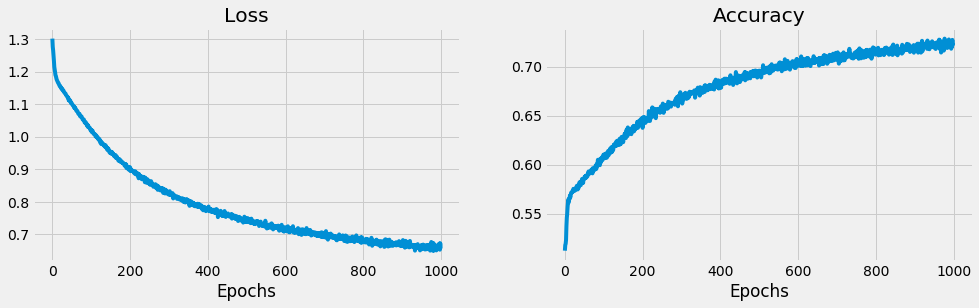

In [724]:
# PLOT MODEL ACCURACY
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(15,4))

ax[0].plot(modelHistory_v1.history['loss'])
ax[0].set_xlabel("Epochs")
ax[0].set_title("Loss")

ax[1].plot(modelHistory_v1.history['accuracy'])
ax[1].set_xlabel("Epochs")
ax[1].set_title("Accuracy")

## Quantifying the Model

In [725]:
model_loss, model_accuracy = fire_model_v1.evaluate(X_test, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

121/121 - 0s - loss: 3.1317 - accuracy: 0.5134
Loss: 3.131730556488037, Accuracy: 0.5134297609329224


In [726]:
### Making Predictions with new data
# new_data = X_scaler.transform(np.array([[-1.2, 0.3, 0.4]]))
new_data = X_test

print(f"Model output: {fire_model_v1.predict(new_data)}")
print(f"Predicted class: {np.argmax(fire_model_v1.predict(new_data))}")

Model output: [[1.14869356e-01 5.36380351e-01 1.32897785e-02 ... 1.73193906e-02
  2.72892773e-01 2.01354752e-10]
 [7.06113756e-01 2.39826977e-01 5.40213846e-02 ... 3.79830744e-05
  5.84464777e-17 2.22242565e-18]
 [9.96630490e-01 8.96178062e-06 1.10655769e-08 ... 8.12619015e-14
  3.87579894e-05 9.13591258e-10]
 ...
 [4.89014000e-01 2.47949958e-01 1.24929240e-02 ... 2.14349180e-02
  8.63834769e-02 1.12404041e-01]
 [2.47384951e-01 1.30866796e-01 1.36595726e-01 ... 1.74780428e-01
  2.37431154e-01 7.27499500e-02]
 [9.92235124e-01 7.76490336e-03 1.08393932e-13 ... 4.08139050e-10
  1.88382030e-17 2.78226790e-18]]
Predicted class: 693


## Model V2

In [727]:
# Deep neural network with X inputs, 2 hidden layers, 10 nodes in each hidden layer, and 7 outputs
from keras.models import Sequential
from keras.layers import Dense

fire_model_v2 = Sequential()
fire_model_v2.add(Dense(units=20, activation='sigmoid', input_dim=NoOfCols))
fire_model_v2.add(Dense(units=128, activation='sigmoid'))
fire_model_v2.add(Dense(units=128, activation='sigmoid'))
fire_model_v2.add(Dense(units=128, activation='sigmoid'))
fire_model_v2.add(Dense(units=7, activation='softmax'))

# view the model's architecture
fire_model_v2.summary()

Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_261 (Dense)            (None, 20)                820       
_________________________________________________________________
dense_262 (Dense)            (None, 128)               2688      
_________________________________________________________________
dense_263 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_264 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_265 (Dense)            (None, 7)                 903       
Total params: 37,435
Trainable params: 37,435
Non-trainable params: 0
_________________________________________________________________


In [728]:
## Compile and train the deep learning model
fire_model_v2.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

modelHistory_v2 = fire_model_v2.fit(
    X_train,
    y_train_categorical,
    epochs=NoOfRuns,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
363/363 - 1s - loss: 1.3027 - accuracy: 0.5142
Epoch 2/1000
363/363 - 0s - loss: 1.2806 - accuracy: 0.5192
Epoch 3/1000
363/363 - 0s - loss: 1.2558 - accuracy: 0.5229
Epoch 4/1000
363/363 - 0s - loss: 1.2320 - accuracy: 0.5472
Epoch 5/1000
363/363 - 0s - loss: 1.2185 - accuracy: 0.5549
Epoch 6/1000
363/363 - 0s - loss: 1.2084 - accuracy: 0.5588
Epoch 7/1000
363/363 - 0s - loss: 1.2039 - accuracy: 0.5619
Epoch 8/1000
363/363 - 0s - loss: 1.1982 - accuracy: 0.5622
Epoch 9/1000
363/363 - 0s - loss: 1.1984 - accuracy: 0.5632
Epoch 10/1000
363/363 - 0s - loss: 1.1960 - accuracy: 0.5637
Epoch 11/1000
363/363 - 0s - loss: 1.1919 - accuracy: 0.5645
Epoch 12/1000
363/363 - 0s - loss: 1.1920 - accuracy: 0.5668
Epoch 13/1000
363/363 - 0s - loss: 1.1891 - accuracy: 0.5681
Epoch 14/1000
363/363 - 0s - loss: 1.1881 - accuracy: 0.5650
Epoch 15/1000
363/363 - 0s - loss: 1.1896 - accuracy: 0.5644
Epoch 16/1000
363/363 - 0s - loss: 1.1861 - accuracy: 0.5642
Epoch 17/1000
363/363 - 0s - loss

Text(0.5, 1.0, 'Accuracy')

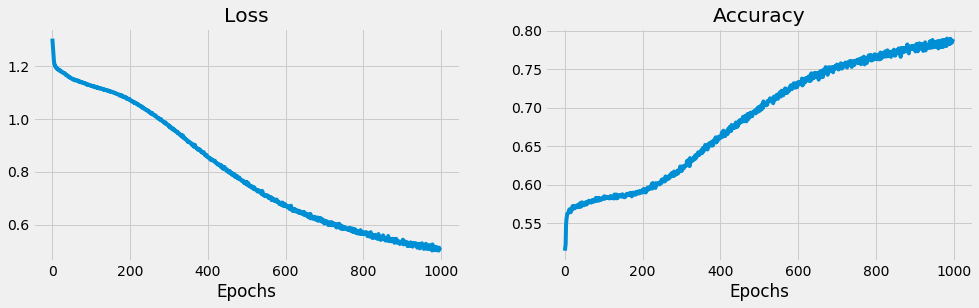

In [729]:
# PLOT MODEL ACCURACY
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(15,4))

ax[0].plot(modelHistory_v2.history['loss'])
ax[0].set_xlabel("Epochs")
ax[0].set_title("Loss")

ax[1].plot(modelHistory_v2.history['accuracy'])
ax[1].set_xlabel("Epochs")
ax[1].set_title("Accuracy")

## Quantifying Model v2

In [730]:
model_loss, model_accuracy = fire_model_v2.evaluate(X_test, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

121/121 - 0s - loss: 2.8247 - accuracy: 0.4855
Loss: 2.824723958969116, Accuracy: 0.48553720116615295


In [731]:
### Making Predictions with new data
# new_data = X_scaler.transform(np.array([[-1.2, 0.3, 0.4]]))
new_data = X_test

print(f"Model output: {fire_model_v2.predict(new_data)}")
print(f"Predicted class: {np.argmax(fire_model_v2.predict(new_data))}")

Model output: [[4.9268395e-01 5.0730085e-01 1.0763001e-07 ... 2.6242090e-19
  1.8156268e-11 1.2444089e-31]
 [9.1516435e-01 8.0742799e-02 4.0916796e-03 ... 3.2628223e-11
  2.7929248e-09 2.9680686e-23]
 [4.4786865e-01 5.5089784e-01 7.5145914e-07 ... 8.2334168e-07
  3.0792042e-05 1.0043794e-07]
 ...
 [4.4922218e-01 3.8400075e-01 5.1917396e-02 ... 6.6773716e-04
  3.2425839e-02 8.3168496e-05]
 [3.1088370e-01 4.8472157e-01 3.4112755e-02 ... 2.4707103e-04
  1.6690980e-01 2.0816154e-03]
 [9.7120452e-01 2.3318116e-02 1.7753311e-03 ... 8.2365728e-14
  3.7020720e-03 3.0558116e-22]]
Predicted class: 91


## Trying some predictions

In [732]:
### View prediction probabilities
predictions_v1 = np.argmax(fire_model_v1.predict(X_test), axis=1)
probs_v1 = fire_model_v1.predict(X_test)

predictions_v2 = np.argmax(fire_model_v2.predict(X_test), axis=1)
probs_v2 = fire_model_v2.predict(X_test)

# Change the shape of y
old_y_test = y_test
new_y_test = np.array(old_y_test)
y_test = new_y_test.reshape(-1, 1) 
y_test
y_test_df = y_test.ravel()
y_test_df


pred_df = pd.DataFrame({
    "Predictions_v1": predictions_v1,
    "Predictions_v2": predictions_v2,
    "Actual": y_test_df, 
    "P(0) model1": np.round(probs_v1[:, 0], 5),
    "P(100) model1": np.round(probs_v1[:, 1], 5),
    "P(0) model2": np.round(probs_v2[:, 0], 5),
    "P(100) model2": np.round(probs_v2[:, 1], 5)
    })

pred_df.head(50)

,Predictions_v1,Predictions_v2,Actual,P(0) model1,P(100) model1,P(0) model2,P(100) model2
0,1,1,1,0.11487,0.53638,0.49268,0.50730
1,0,0,1,0.70611,0.23983,0.91516,0.08074
2,0,1,1,0.99663,0.00001,0.44787,0.55090
3,0,0,0,0.99421,0.00579,0.99957,0.00043
4,3,1,1,0.00301,0.00589,0.00000,0.78280
5,1,1,2,0.01372,0.69937,0.00100,0.50457
6,0,1,0,0.29910,0.25033,0.13419,0.37569
7,0,0,0,0.87790,0.08062,0.63042,0.28368
8,0,4,0,0.44557,0.21299,0.18737,0.33032
9,0,1,5,0.82817,0.00002,0.18441,0.35848


In [733]:
model_loss, model_accuracy = fire_model_v1.evaluate(X_test, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

model_loss, model_accuracy = fire_model_v2.evaluate(X_test, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

121/121 - 0s - loss: 3.1317 - accuracy: 0.5134
Normal Neural Network - Loss: 3.131730556488037, Accuracy: 0.5134297609329224
121/121 - 0s - loss: 2.8247 - accuracy: 0.4855
Deep Neural Network - Loss: 2.824723958969116, Accuracy: 0.48553720116615295


In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename1 = 'NN_Model_v1.sav'
joblib.dump(fire_model_v1, filename1)

filename2 = 'NN_Model_v2.sav'
joblib.dump(fire_model_v2, filename2)